In [1]:
import nltk
import string
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True



Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon.
2. Tokenize the text into words and sentences.
3. Remove stopwords (using NLTK's stopwords list).
4. Display word frequency distribuƟon (excluding stopwords)



In [3]:
paragraph = """ Investing is a strategic approach to growing wealth by allocating funds to assets like stocks, bonds, mutual funds, or real estate. It requires careful analysis of market trends, risk tolerance, and financial goals. Successful investors diversify portfolios, balancing risks and rewards for long-term growth. Patience and discipline are essential, as markets fluctuate over time. Whether through active trading or passive investing, understanding economic indicators and company performance is crucial. The power of compounding helps money grow exponentially, making early investments advantageous. With informed decisions and proper planning, investing can secure financial stability and future prosperity, adapting to evolving market conditions"""

In [5]:
lowerpunc = paragraph.lower().translate(str.maketrans('', '', string.punctuation))
lowerpunc

' investing is a strategic approach to growing wealth by allocating funds to assets like stocks bonds mutual funds or real estate it requires careful analysis of market trends risk tolerance and financial goals successful investors diversify portfolios balancing risks and rewards for longterm growth patience and discipline are essential as markets fluctuate over time whether through active trading or passive investing understanding economic indicators and company performance is crucial the power of compounding helps money grow exponentially making early investments advantageous with informed decisions and proper planning investing can secure financial stability and future prosperity adapting to evolving market conditions'

In [7]:
sentences = sent_tokenize(lower_nopunct)
words = word_tokenize(lower_nopunct)

print("Tokenized Sentences:\n", sentences)
print("\nTokenized Words:\n", words)

stwords = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stwords]

print("\nFiltered Words (Stopwords Removed):\n", filtered_words)

Tokenized Sentences:
 [' investing is a strategic approach to growing wealth by allocating funds to assets like stocks bonds mutual funds or real estate it requires careful analysis of market trends risk tolerance and financial goals successful investors diversify portfolios balancing risks and rewards for longterm growth patience and discipline are essential as markets fluctuate over time whether through active trading or passive investing understanding economic indicators and company performance is crucial the power of compounding helps money grow exponentially making early investments advantageous with informed decisions and proper planning investing can secure financial stability and future prosperity adapting to evolving market conditions']

Tokenized Words:
 ['investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'it', 'requires', 'careful', 'ana

In [9]:
fdist = FreqDist(filtered_words)
print("\nTop 10 Most Common Words:")
for word, freq in fdist.most_common(10):
    print(f"{word}: {freq}")


Top 10 Most Common Words:
investing: 3
funds: 2
market: 2
financial: 2
strategic: 1
approach: 1
growing: 1
wealth: 1
allocating: 1
assets: 1


<Axes: title={'center': 'Top 10 Word Frequencies (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

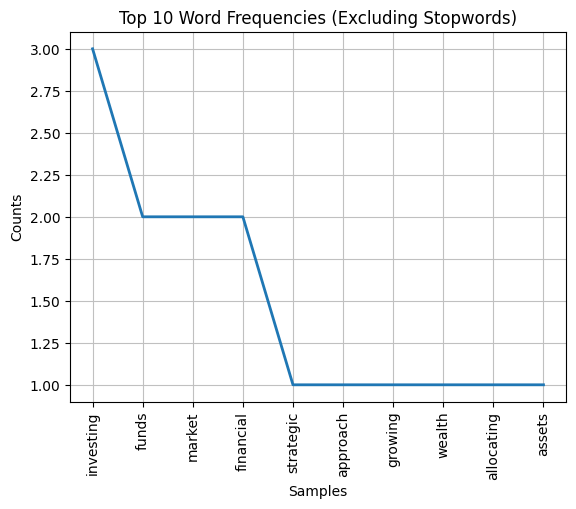

In [10]:
fdist.plot(10, title="Top 10 Word Frequencies (Excluding Stopwords)")

Q2: Stemming and LemmaƟzaƟon
1. Take the tokenized words from QuesƟon 1 (aŌer stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
3. Apply lemmaƟzaƟon using NLTK's WordNetLemmaƟzer.
4. Compare and display results of both techniques.

In [12]:
text = paragraph.lower().translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text)
filtered_words = [word for word in words if word not in stopwords.words('english')]



porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [13]:
print(f"{'Original':<15}{'Porter Stem':<15}{'Lancaster Stem':<20}{'Lemmatized':<15}")
print("-" * 65)
for word in filtered_words:
    print(f"{word:<15}{porter.stem(word):<15}{lancaster.stem(word):<20}{lemmatizer.lemmatize(word):<15}")

Original       Porter Stem    Lancaster Stem      Lemmatized     
-----------------------------------------------------------------
investing      invest         invest              investing      
strategic      strateg        strategic           strategic      
approach       approach       approach            approach       
growing        grow           grow                growing        
wealth         wealth         weal                wealth         
allocating     alloc          alloc               allocating     
funds          fund           fund                fund           
assets         asset          asset               asset          
like           like           lik                 like           
stocks         stock          stock               stock          
bonds          bond           bond                bond           
mutual         mutual         mut                 mutual         
funds          fund           fund                fund           
real      

Q3. Regular Expressions and Text Spliƫng
1. Take their original text from QuesƟon 1.
2. Use regular expressions to:
a. Extract all words with more than 5 leƩers.
b. Extract all numbers (if any exist in their text).
c. Extract all capitalized words.
3. Use text spliƫng techniques to:
a. Split the text into words containing only alphabets (removing digits and special
characters).
b. Extract words starƟng with a vowel.

In [15]:
words5 = re.findall(r'\b[a-zA-Z]{6,}\b', paragraph)
print("Words with more than 5 letters:\n", words5)

Words with more than 5 letters:
 ['Investing', 'strategic', 'approach', 'growing', 'wealth', 'allocating', 'assets', 'stocks', 'mutual', 'estate', 'requires', 'careful', 'analysis', 'market', 'trends', 'tolerance', 'financial', 'Successful', 'investors', 'diversify', 'portfolios', 'balancing', 'rewards', 'growth', 'Patience', 'discipline', 'essential', 'markets', 'fluctuate', 'Whether', 'through', 'active', 'trading', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'company', 'performance', 'crucial', 'compounding', 'exponentially', 'making', 'investments', 'advantageous', 'informed', 'decisions', 'proper', 'planning', 'investing', 'secure', 'financial', 'stability', 'future', 'prosperity', 'adapting', 'evolving', 'market', 'conditions']


In [16]:
numbers = re.findall(r'\b\d+\b', paragraph)
print("\nNumbers in text:\n", numbers if numbers else "No numbers found.")


Numbers in text:
 No numbers found.


In [17]:
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', paragraph)
print("\nCapitalized words:\n", capitalized_words)


Capitalized words:
 ['Investing', 'It', 'Successful', 'Patience', 'Whether', 'The', 'With']


In [18]:
alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)
print("\nAlphabetic words:\n", alphabetic_words)


Alphabetic words:
 ['Investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'It', 'requires', 'careful', 'analysis', 'of', 'market', 'trends', 'risk', 'tolerance', 'and', 'financial', 'goals', 'Successful', 'investors', 'diversify', 'portfolios', 'balancing', 'risks', 'and', 'rewards', 'for', 'long', 'term', 'growth', 'Patience', 'and', 'discipline', 'are', 'essential', 'as', 'markets', 'fluctuate', 'over', 'time', 'Whether', 'through', 'active', 'trading', 'or', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'and', 'company', 'performance', 'is', 'crucial', 'The', 'power', 'of', 'compounding', 'helps', 'money', 'grow', 'exponentially', 'making', 'early', 'investments', 'advantageous', 'With', 'informed', 'decisions', 'and', 'proper', 'planning', 'investing', 'can', 'secure', 'financial', 'stability', 'and', 'future', 'prosperity', 

In [19]:
vowel_words = re.findall(r'\b[aeiouAEIOU][a-zA-Z]*\b', paragraph)
print("\nWords starting with a vowel:\n", vowel_words)


Words starting with a vowel:
 ['Investing', 'is', 'a', 'approach', 'allocating', 'assets', 'or', 'estate', 'It', 'analysis', 'of', 'and', 'investors', 'and', 'and', 'are', 'essential', 'as', 'over', 'active', 'or', 'investing', 'understanding', 'economic', 'indicators', 'and', 'is', 'of', 'exponentially', 'early', 'investments', 'advantageous', 'informed', 'and', 'investing', 'and', 'adapting', 'evolving']


Q4. Custom TokenizaƟon & Regex-based Text Cleaning
1. Take original text from QuesƟon 1.
2. Write a custom tokenizaƟon funcƟon that:
a. Removes punctuaƟon and special symbols, but keeps contracƟons (e.g.,
"isn't" should not be split into "is" and "n't").
b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains
a single token).
c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14"
should remain as is).
3. Use Regex SubsƟtuƟons (re.sub) to:
a. Replace email addresses with '<EMAIL>' placeholder.
b. Replace URLs with '<URL>' placeholder.
c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with
'<PHONE>' placeholder

In [24]:
def customtokenizer(text):
    pattern = r"""
        \b(?:\d+\.\d+|\d+)\b                    # Decimal or integer numbers
        | \b\w+(?:-\w+)*\b                      # Words, possibly hyphenated
        | \b\w+'\w+\b                           # Contractions like isn't, don't
    """
    tokens = re.findall(pattern, text, re.VERBOSE)
    return tokens

In [25]:
def cleantext(text):
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '<EMAIL>', text)
    text = re.sub(r'https?://\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'(\+?\d{1,3}[\s-])?\d{3}[-\s]?\d{3}[-\s]?\d{4}', '<PHONE>', text)
    return text

In [29]:
cleanpara = cleantext(paragraph)
custtokens = customtokenizer(cleanpara)
print("Cleaned Text:\n", cleanpara)
print("\nCustom Tokens:\n", custtokens)

Cleaned Text:
  Investing is a strategic approach to growing wealth by allocating funds to assets like stocks, bonds, mutual funds, or real estate. It requires careful analysis of market trends, risk tolerance, and financial goals. Successful investors diversify portfolios, balancing risks and rewards for long-term growth. Patience and discipline are essential, as markets fluctuate over time. Whether through active trading or passive investing, understanding economic indicators and company performance is crucial. The power of compounding helps money grow exponentially, making early investments advantageous. With informed decisions and proper planning, investing can secure financial stability and future prosperity, adapting to evolving market conditions

Custom Tokens:
 ['Investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'It', 'requires', 'careful',